### Data Profiling ###
Some further data profiling action with the newly prepared usage_stats file.

In [1]:
#import libraries
%matplotlib inline
import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium as fo
#import folium.plugins as plugins
import requests
import json
import os

#from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from datetime import datetime, timedelta, timezone
from folium.plugins import HeatMap, MarkerCluster

D:\Anaconda3\envs\prana\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
df_stations = pd.read_csv("usage_stats_cleaned_new2.csv")
df_stations.rename(columns = {'StartStation  latitude':'StartStation latitude', 'EndStation  latitude':'EndStation latitude'}, inplace = True)

In [3]:
print(df_stations.count())
df_stations[df_stations["StartStation Id"] == 1].head()

def distance(row):
    """Get distance between pairs of lat-lon points"""
    return geodesic((row["StartStation latitude"], row["StartStation longitude"]), 
                    (row["EndStation latitude"], row["EndStation longitude"])).km

df_stations['distance (geodesic)'] = df_stations.apply(lambda row: distance(row),axis=1)
df_stations.head()


StartStation Id           6643573
Start Date                6643573
EndStation Id             6643573
End Date                  6643573
Duration                  6643573
StartStation Id Used      6643573
EndStation Id Used        6643573
Frequency                 6643573
StartStation Address      6643573
StartStation latitude     6643573
StartStation longitude    6643573
StartStation capacity     6643573
EndStation Address        6643573
EndStation latitude       6643573
EndStation longitude      6643573
EndStation capacity       6643573
dtype: int64


StartStation Id        Start Date  EndStation Id          End Date  \
0              836  06/09/2018 18:03            749  06/09/2018 18:38   
1              831  24/07/2018 20:17            638  24/07/2018 20:39   
2              831  06/06/2018 09:33            264  06/06/2018 09:56   
3              831  17/09/2018 16:39            638  17/09/2018 17:06   
4              831  18/04/2018 08:44            372  18/04/2018 09:12   

   Duration  StartStation Id Used  EndStation Id Used  Frequency  \
0      2100                   325               49668          1   
1      1320                  2294               68917          5   
2      1380                  2294               74294          1   
3      1620                  2294               68917          5   
4      1680                  2294               50130          2   

          StartStation Address  StartStation latitude  StartStation longitude  \
0        York Way, Kings Cross              51.541596               -0.125441   
1  St John's Crescent, Brixton              51.466232               -0.113180   
2  St John's Crescent, Brixton              51.466232               -0.113180   
3  St John's Crescent, Brixton              51.466232               -0.113180   
4  St John's Crescent, Brixton              51.466232               -0.113180   

   StartStation capacity             EndStation Address  EndStation latitude  \
0                     24    Haggerston Road, Haggerston            51.539329   
1                     25  Falcon Road, Clapham Junction            51.466634   
2                     25      Tysoe Street, Clerkenwell            51.526443   
3                     25  Falcon Road, Clapham Junction            51.466634   
4                     25       Sardinia Street, Holborn            51.515208   

   EndStation longitude  EndStation capacity  distance (geodesic)  
0             -0.074285                   37             3.558160  
1             -0.169821                   28             3.936338  
2             -0.109257                   20             6.704526  
3             -0.169821                   28             3.936338  
4             -0.117863                   24             5.458654

In [4]:
#Max distance
print(df_stations.iloc[df_stations["distance (geodesic)"].idxmax()])
#Min distance
df_stations.iloc[df_stations["distance (geodesic)"].idxmin()]

StartStation Id                                    790
Start Date                            02/07/2018 17:18
EndStation Id                                      694
End Date                              02/07/2018 18:28
Duration                                          4200
StartStation Id Used                             23992
EndStation Id Used                               15593
Frequency                                            2
StartStation Address      Stratford Station, Stratford
StartStation latitude                          51.5418
StartStation longitude                        -0.00481
StartStation capacity                               28
EndStation Address         Putney Rail Station, Putney
EndStation latitude                            51.4607
EndStation longitude                         -0.216526
EndStation capacity                                 20
distance (geodesic)                             17.248
Name: 5047163, dtype: object


StartStation Id                                    273
Start Date                            29/07/2017 13:57
EndStation Id                                      819
End Date                              29/07/2017 13:57
Duration                                             0
StartStation Id Used                             75013
EndStation Id Used                               23772
Frequency                                          476
StartStation Address      Belvedere Road 1, South Bank
StartStation latitude                          51.5061
StartStation longitude                       -0.114686
StartStation capacity                               38
EndStation Address        Belvedere Road 2, South Bank
EndStation latitude                            51.5062
EndStation longitude                         -0.114842
EndStation capacity                                 38
distance (geodesic)                          0.0137722
Name: 6105030, dtype: object

In [5]:
#Set list of relevance for plotting rental stations
filter_list = ["EndStation Id",
           "EndStation Id Used",
           "Start Date",
           "End Date",
         #  "StartStation Address",
           "Frequency",
           "EndStation Address",
           "EndStation latitude",
           "EndStation longitude",
           "EndStation capacity",
           "distance (geodesic)"
]
df_startStations = df_stations.drop(filter_list, axis = 1)
#Unique stations
df_startStations.drop_duplicates(subset=("StartStation Id"), keep="first", inplace=True)
print(df_startStations.count())
df_startStations.dropna(0, inplace=True)
df_startStations.head()

StartStation Id           783
Duration                  783
StartStation Id Used      783
StartStation Address      783
StartStation latitude     783
StartStation longitude    783
StartStation capacity     783
dtype: int64


StartStation Id  Duration  StartStation Id Used  \
0               836      2100                   325   
1               831      1320                  2294   
10              805      1500                  4153   
12               79      1020                  4187   
16              474      1020                  4260   

                StartStation Address  StartStation latitude  \
0              York Way, Kings Cross              51.541596   
1        St John's Crescent, Brixton              51.466232   
10  Bevington Road, North Kensington              51.520069   
12            Arundel Street, Temple              51.511726   
16      Castalia Square, Cubitt Town              51.498125   

    StartStation longitude  StartStation capacity  
0                -0.125441                     24  
1                -0.113180                     25  
10               -0.206338                     27  
12               -0.113856                     18  
16               -0.011457                     39

In [6]:
df_startStations["StartStation capacity"] = df_startStations["StartStation capacity"].astype("str")
df_startStations["StartStation Id Used"] = df_startStations["StartStation Id Used"].astype("float64")
df_startStations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 85003
Data columns (total 7 columns):
StartStation Id           783 non-null int64
Duration                  783 non-null int64
StartStation Id Used      783 non-null float64
StartStation Address      783 non-null object
StartStation latitude     783 non-null float64
StartStation longitude    783 non-null float64
StartStation capacity     783 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


In [7]:
#Plot top 10 used rental stations
m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start= 10
)


df_startStations_top = df_startStations.sort_values(by=['StartStation Id Used'], ascending=False)[:1]
#top markers
for index, p in df_startStations_top[['StartStation latitude','StartStation longitude','StartStation capacity', 'StartStation Id Used']].iterrows():
    fo.Marker(
    location=[p['StartStation latitude'], p['StartStation longitude']],
    icon=fo.Icon(color='red'),
    popup="Capacity: " + p['StartStation capacity'] + '</br>' + " Used between 2016 and 2018: " + str(p['StartStation Id Used']),
    ).add_to(m)
    
df_startStations_rest = df_startStations.sort_values(by=['StartStation Id Used'], ascending=False)[1:10]
#rest markers
for index, p in df_startStations_rest[['StartStation latitude','StartStation longitude','StartStation capacity', 'StartStation Id Used']].iterrows():
    fo.Marker(
    location=[p['StartStation latitude'], p['StartStation longitude']],
    icon=fo.Icon(color='green'),
    popup="Capacity: " + p['StartStation capacity'] + '</br>' + " Used between 2016 and 2018: " + str(p['StartStation Id Used']),
    ).add_to(m)
    
    
# Circle marker
fo.CircleMarker([51.509865, -0.118092],
                    radius=10,
                    popup='Centroid',
                    color='darkred',
                    fill_opacity=0.2
                    ).add_to(m)


#For Normalizing reasons
max_amount = float(df_startStations['StartStation Id Used'].max())

hm_wide = HeatMap(list(zip(df_startStations["StartStation latitude"].values, df_startStations["StartStation longitude"].values, df_startStations["StartStation Id Used"].values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=8, 
                 )

hm_wide.add_to(m)
m.save(outfile= "most_stations.html")
m

#### Plotting Routes ####
* Routes between StartStation and EndStation with Graphhopper API (n to m relation)
* Use time data (departure and arrival times) of each station for switching between day and night cycle

In [8]:
df_stations.info()
###Same startstation id and endstation id combination = frequency of used route

#df_routes["Frequency"] = df_stations.groupby(by=["StartStation Id", "EndStation Id"]).count().reset_index()["Duration"]
df_routes = df_stations.copy(True)
print("\nMost traveled route: ")
print(df_routes.iloc[df_routes["Frequency"].idxmax()])
#Remove double startstation and endstation 
df_routes = df_routes.drop_duplicates(subset=("StartStation Id", "EndStation Id"), keep='first')

#Save route endpoints
df_routes.to_csv(r"C:\Users\Pascal\Desktop\Cycles_Cleaned\routes_cleaned.csv", index=None, header=True)
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643573 entries, 0 to 6643572
Data columns (total 17 columns):
StartStation Id           int64
Start Date                object
EndStation Id             int64
End Date                  object
Duration                  int64
StartStation Id Used      int64
EndStation Id Used        int64
Frequency                 int64
StartStation Address      object
StartStation latitude     float64
StartStation longitude    float64
StartStation capacity     int64
EndStation Address        object
EndStation latitude       float64
EndStation longitude      float64
EndStation capacity       int64
distance (geodesic)       float64
dtypes: float64(5), int64(8), object(4)
memory usage: 861.7+ MB

Most traveled route: 
StartStation Id                                           307
Start Date                                25/12/2015 11:21:00
EndStation Id                                             404
End Date                                  25/12/2015 14:

In [9]:
#Optional, read routes from checkpoint
df_routes = pd.read_csv("routes_cleaned.csv")
df_routes.info()
#display(df_routes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470190 entries, 0 to 470189
Data columns (total 17 columns):
StartStation Id           470190 non-null int64
Start Date                470190 non-null object
EndStation Id             470190 non-null int64
End Date                  470190 non-null object
Duration                  470190 non-null int64
StartStation Id Used      470190 non-null int64
EndStation Id Used        470190 non-null int64
Frequency                 470190 non-null int64
StartStation Address      470190 non-null object
StartStation latitude     470190 non-null float64
StartStation longitude    470190 non-null float64
StartStation capacity     470190 non-null int64
EndStation Address        470190 non-null object
EndStation latitude       470190 non-null float64
EndStation longitude      470190 non-null float64
EndStation capacity       470190 non-null int64
distance (geodesic)       470190 non-null float64
dtypes: float64(5), int64(8), object(4)
memory usage: 61.0+

In [10]:
# graphhopper API (Plotting folium map)
endpoint = 'http://i-hadoop-04.informatik.hs-ulm.de:11111/route?'
point = 'point='
urlEnd = '&locale=de&vehicle=bike&weighting=fastest&elevation=false&use_miles=false&type=json&points_encoded=false'

m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start=12,
    prefer_canvas=True,
    tiles='CartoDB dark_matter' #to see the routes better
)

#Marker cluster for performance
marker_cluster = MarkerCluster().add_to(m)

for index, p in df_routes[['StartStation latitude','StartStation longitude', 'EndStation latitude', 
                           'EndStation longitude', 'StartStation Address', 'EndStation Address', 
                           "Frequency"]][:1000].iterrows(): #problem map will be slow

    startX = str(p["StartStation latitude"])
    startY = str(p["StartStation longitude"])
    endX = str(p["EndStation latitude"])
    endY = str(p["EndStation longitude"])
    sname = str(p["StartStation Address"])
    ename = str(p["EndStation Address"])
    freq = p["Frequency"]

    try:
        r = requests.get(endpoint + point + startX + ',' + startY + '&' + point + endX + ',' + endY + urlEnd)
        #r = requests.get('http://i-nominatim-01.informatik.hs-ulm.de:11111/route?point=51.131,12.414&point=48.224,3.867&vehicle=bike&locale=de&type=json&points_encoded=false')
        r.json()
    except Exception:
        print("Something went wrong " + str(r.status_code))

    # Get list of waypoint coordinates
    inversed_coordinates = r.json()['paths'][0]['points']['coordinates']
    inversed_coordinates

    # folium
    coordinates = [(x, y) for (y, x) in inversed_coordinates]
    fo.features.PolyLine(coordinates, weight=(freq - df_routes["Frequency"].mean())/df_routes["Frequency"].std(),
                      #  opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min()),
                         popup="Used between 2016 and 2018: " + str(int(p["Frequency"])) + "x", opacity = 1).add_to(m)
    #y = (x - mean) / standard_deviation  (Standardization)
    #y = (x - min) / (max - min)  (Normalization)


#Add markers (unique)
df_startStations[:len(df_startStations)].apply(lambda row:fo.Marker(location=[row["StartStation latitude"], 
                                                  row["StartStation longitude"]],
                                                  popup=row['StartStation Address'],
                                                  icon=fo.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster),axis=1)
m.save(outfile= "routes_stations.html")
m

In [11]:
def CreateUrl(frame, limit):
        """Creating the URL for each individual route"""

        endpoint = 'http://i-hadoop-04.informatik.hs-ulm.de:11111/route?'
        point = 'point='
        urlEnd = '&locale=de&vehicle=bike&weighting=fastest&elevation=false&use_miles=false&type=json&points_encoded=false'

        url_liste = pd.DataFrame(columns={"URL", "Frequency"})
        #url_list_routes = []

        for index, p in df_routes[['StartStation latitude','StartStation longitude', 'EndStation latitude', 
                           'EndStation longitude', 'Frequency'
                          ]][:limit].iterrows():

                startX = str(p["StartStation latitude"])
                startY = str(p["StartStation longitude"])
                endX = str(p["EndStation latitude"])
                endY = str(p["EndStation longitude"])
                freq = str(p["Frequency"])
                try:
                    url = endpoint + point + startX + ',' + startY + '&' + point + endX + ',' + endY + urlEnd
                    url_liste = url_liste.append({'URL' : url , 'Frequency' : freq} , ignore_index=True)
                    
                except Exception:
                    print("Something went wrong")
        return url_liste



#### Weather Data ####

>Requesting weather api for getting local based weather data. <br>
Darksky Weather API 1000 requests per day. Be careful with that limitation.


In [150]:
### Read weather data for London with darksky api (1000 requests per day)
df_dates = pd.read_csv("dates.csv")
df_dates['Start Date'].replace('\.','/',inplace=True, regex=True)
df_dates.head()
#old api_key = #"f55c6080da9427e96339ae16c9ddc595"
api_key = "f8e9c2381b3c16decc0f5b06fbe1e324"
df_dates["Daily Weather"] = ""
df_dates["Hourly Weather"] = ""

for index, p in df_dates.iterrows():
    timestamp = str(int(datetime.strptime(df_dates["Start Date"][index], '%d/%m/%Y'
                             ).replace(tzinfo=timezone.utc).timestamp()))
    weather_resp = requests.get('https://api.darksky.net/forecast/'+api_key+'/51.509865,-0.118092,'+timestamp+'?exclude=currently,flags,minutely')
    df_dates["Daily Weather"].iloc[index] = weather_resp.json()['daily']['data'][0].get('icon', 'No weather data')
    df_dates["Hourly Weather"].iloc[index] = weather_resp.json()['hourly']['data']
    
df_dates.head()
df_dates.to_csv("dates and weather_new.csv", index=None, header=True)

In [13]:
# merge dataframe to origin back
df_r = df_routes.copy(True)
df_r["Start Date"] = df_r["Start Date"].str[:10]
df_w = pd.read_csv("dates and weather_new.csv", sep=";")
df_w['Start Date'].replace('\.','/',inplace=True, regex=True)
df_t = pd.merge(df_r, df_w, on="Start Date", how='left')
df_routes = pd.concat([df_routes, df_t[["Daily Weather", "Hourly Weather"]]], axis=1)
df_routes.head(10)

StartStation Id        Start Date  EndStation Id          End Date  \
0              836  06/09/2018 18:03            749  06/09/2018 18:38   
1              831  24/07/2018 20:17            638  24/07/2018 20:39   
2              831  06/06/2018 09:33            264  06/06/2018 09:56   
3              831  18/04/2018 08:44            372  18/04/2018 09:12   
4              831  15/08/2018 08:45             41  15/08/2018 09:14   
5              831  19/07/2018 15:52            682  19/07/2018 16:43   
6              805  08/11/2016 09:23            424  08/11/2016 09:48   
7               79  28/03/2018 18:34             10  28/03/2018 18:51   
8               79  29/08/2018 19:50            606  29/08/2018 20:32   
9              474  15/04/2015 16:48            551  15/04/2015 17:05   

   Duration  StartStation Id Used  EndStation Id Used  Frequency  \
0      2100                   325               49668          1   
1      1320                  2294               68917          5   
2      1380                  2294               74294          1   
3      1680                  2294               50130          2   
4      1740                  2294               88345          1   
5      3060                  2294               45668          1   
6      1500                  4153               44482          2   
7      1020                  4187               37906          3   
8      2520                  4187               15698          1   
9      1020                  4260               21546        170   

               StartStation Address  StartStation latitude  \
0             York Way, Kings Cross              51.541596   
1       St John's Crescent, Brixton              51.466232   
2       St John's Crescent, Brixton              51.466232   
3       St John's Crescent, Brixton              51.466232   
4       St John's Crescent, Brixton              51.466232   
5       St John's Crescent, Brixton              51.466232   
6  Bevington Road, North Kensington              51.520069   
7            Arundel Street, Temple              51.511726   
8            Arundel Street, Temple              51.511726   
9      Castalia Square, Cubitt Town              51.498125   

   StartStation longitude  StartStation capacity  \
0               -0.125441                     24   
1               -0.113180                     25   
2               -0.113180                     25   
3               -0.113180                     25   
4               -0.113180                     25   
5               -0.113180                     25   
6               -0.206338                     27   
7               -0.113856                     18   
8               -0.113856                     18   
9               -0.011457                     39   

                EndStation Address  EndStation latitude  EndStation longitude  \
0      Haggerston Road, Haggerston            51.539329             -0.074285   
1    Falcon Road, Clapham Junction            51.466634             -0.169821   
2        Tysoe Street, Clerkenwell            51.526443             -0.109257   
3         Sardinia Street, Holborn            51.515208             -0.117863   
4  Pindar Street, Liverpool Street            51.520955             -0.083494   
5          Crisp Road, Hammersmith            51.488108             -0.226606   
6            Ebury Bridge, Pimlico            51.490491             -0.149186   
7            Park Street, Bankside            51.505974             -0.092754   
8       Addison Road, Holland Park            51.504199             -0.210941   
9        Import Dock, Canary Wharf            51.505772             -0.016460   

   EndStation capacity  distance (geodesic)        Daily Weather  \
0                   37             3.558160    partly-cloudy-day   
1                   28             3.936338    partly-cloudy-day   
2                   20             6.704526    partly-cloudy-day   
3                   24        

#### Get Graphhopper waypoints ####

>Requesting graphhopper server for fetching route coordinates. Using asynchronous remote procedure calls. (Takes around 4 hours to request all routes).


In [25]:
import asyncio
import requests
import json
from aiohttp import ClientSession
from datetime import datetime
from pprint import pprint

#limit for routes (test reasons)
limit = len(df_routes)
#Create df of urls
url_df = CreateUrl(df_routes, limit)
#Create empty df for distinction (otherwise the whole list will be plotted as one single line)
df_empty = pd.DataFrame(index=np.arange(0, 1), columns=('lon', 'lat', 'frequency'))
#list for coordinates of waypoints
df_waypoints = []


async def get_data(session, url, freq, i):
    start_time = datetime.now()
    try:
        async with session.get(url) as resp:
            r = await resp.json()
            coord = r['paths'][0]['points']['coordinates']
            df_journey = pd.DataFrame(coord[:], columns=['lon', 'lat'])
            df_journey['frequency'] = freq
            df_journey = df_journey.append(df_empty)
            df_waypoints.append(df_journey)
    except Exception as e:
        print("running %d" % i, e)


async def boundary(sem, session, url, freq, i):
    async with sem:
        await get_data(session, url, freq, i)


async def run(num):
    tasks = []
    sem = asyncio.Semaphore(10000)
    async with ClientSession() as session:
        for i in range(num):
            task = asyncio.ensure_future(boundary(sem, session, str(url_df['URL'][i]), url_df['Frequency'][i], i))
            tasks.append(task)
        responses = asyncio.gather(*tasks)
        await responses
        

start = datetime.now()
#loop = asyncio.get_event_loop()
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)
#future = asyncio.ensure_future(run_login(number))
loop.run_until_complete(run(limit))
loop.close()

routes_complete = pd.concat(df_waypoints, ignore_index=True)
routes_complete.to_csv('all_id_routes.csv', header=True, index=None)

print(routes_complete.shape)
routes_complete.loc[2:15]

hallo
running 521 None
(52314607, 3)


lon        lat frequency
2  -0.113589  51.465825       5.0
3  -0.113734  51.465617       5.0
4  -0.113937  51.465203       5.0
5  -0.113952  51.465092       5.0
6  -0.113935  51.465024       5.0
7  -0.113888  51.464971       5.0
8  -0.113707  51.464911       5.0
9  -0.113860  51.464865       5.0
10 -0.113909  51.464820       5.0
11 -0.114189  51.464724       5.0
12 -0.114574  51.463829       5.0
13 -0.115639  51.463971       5.0
14 -0.115890  51.463963       5.0
15 -0.115959  51.464009       5.0

In [17]:
##Checkpoint
routes_complete = pd.read_csv("all_id_routes.csv")

In [18]:
pd.set_option('display.max_rows', 100)
routes_complete.info()
routes_complete = routes_complete.astype({"frequency": float})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52314607 entries, 0 to 52314606
Data columns (total 3 columns):
lon          float64
lat          float64
frequency    float64
dtypes: float64(3)
memory usage: 1.2 GB


In [19]:
routes_complete.head()

lon        lat  frequency
0 -0.113191  51.466253        5.0
1 -0.113381  51.466212        5.0
2 -0.113589  51.465825        5.0
3 -0.113734  51.465617        5.0
4 -0.113937  51.465203        5.0

#### New round with plotting routes (folium) ####
> Take only unique waypoints and ignore routes that has only been used 1 time
___TODO:___ Add timeslider


In [71]:
#Time Slider
#Datentypen überprüfen
#Zeiten extrahieren, dass nur noch die Zeiten da stehen
#Granularität auf Stunde
#Benötigt StartStation/EndStation Timestamps

In [37]:
liste = []
lis = []
for index, p in routes_complete[:100].iterrows():
    startX = p["lat"]
    startY = p["lon"]
    if (startX == 0):
            liste.append([lis, [freq]])        
            lis = []

    else:
        freq = int(p["frequency"])
        lis.append((startX, startY))

liste[0][1]

[5]

In [ ]:
%%time
len(liste)
for index, p in routes_complete.iterrows():
    h = 2
print(h)

In [20]:
routes_complete.loc[(routes_complete["frequency"]==1)].count()
#remove values with frequency 2 or less
#maybe only top 20%
#try to plot only unique ones

lon          9536022
lat          9536022
frequency    9536022
dtype: int64

In [23]:
routes_complete[["lat", "lat"]].nunique()

lat    22915
lat    22915
dtype: int64

In [22]:
#%%time
m = fo.Map(
    location=(51.509865, -0.118092),
    zoom_start=12,
    prefer_canvas=True,
    tiles='CartoDB dark_matter' #to see the routes better
)


liste = []
routes_complete.fillna(0, inplace=True)
freq_mean = routes_complete["frequency"].mean()
freq_std = routes_complete["frequency"].std()
freq_min = routes_complete["frequency"].min()
freq_max = routes_complete["frequency"].max()

#opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min())

for index, p in routes_complete[:10000].iterrows():
    startX = p["lat"]
    startY = p["lon"]
    if (startX == 0):
            fo.PolyLine(liste, weight=(freq - freq_mean)/freq_std, opacity=-1*(freq-freq_mean)/(freq_std),
                                 popup="Used between 2016 and 2018: " + str(int(freq)) + "x"
                                 ,color="red").add_to(m)
            liste = []
            #print(-1*(freq-freq_mean)/(freq_std))
    else:
            freq = int(p["frequency"])
            liste.append((startX, startY))


m

In [361]:
coordinates
 # Get list of waypoint coordinates
    inversed_coordinates = r.json()['paths'][0]['points']['coordinates']
    inversed_coordinates

    # folium
    coordinates = [(x, y) for (y, x) in inversed_coordinates]
    fo.features.PolyLine(coordinates, weight=(freq - df_routes["Frequency"].mean())/df_routes["Frequency"].std(),
                      #  opacity = (freq - df_routes["Frequency"].min())/(df_routes["Frequency"].max() - df_routes["Frequency"].min()),
                         popup="Used between 2016 and 2018: " + str(freq) + "x", opacity = 1).add_to(m)
    #y = (x - mean) / standard_deviation  (Standardization)
    #y = (x - min) / (max - min)  (Normalization)


#Add markers (unique)
df_startStations[:len(df_startStations)].apply(lambda row:fo.Marker(location=[row["StartStation latitude"], 
                                                  row["StartStation longitude"]],
                                                  popup=row['StartStation Address'],
                                                  icon=fo.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster),axis=1)
m.save(outfile= "routes_stations.html")
m

[(51.516537, -0.164421),
 (51.516563, -0.164374),
 (51.516047, -0.163612),
 (51.516258, -0.162468),
 (51.516424, -0.161404),
 (51.516652, -0.160138),
 (51.517411, -0.155539),
 (51.517755, -0.15356),
 (51.517866, -0.15288),
 (51.517849, -0.152818),
 (51.517059, -0.152436),
 (51.517028, -0.152329),
 (51.516808, -0.152166),
 (51.517003, -0.150723),
 (51.517272, -0.149194),
 (51.515395, -0.148392),
 (51.515528, -0.147594),
 (51.515216, -0.147438),
 (51.515083, -0.147335),
 (51.514641, -0.146914),
 (51.512303, -0.14446),
 (51.510557, -0.142659),
 (51.511076, -0.1413),
 (51.509992, -0.14024),
 (51.510152, -0.139778),
 (51.510139, -0.139612),
 (51.510366, -0.138411),
 (51.510392, -0.138055),
 (51.510484, -0.137515),
 (51.510519, -0.137379),
 (51.511848, -0.134963),
 (51.512397, -0.133829),
 (51.512596, -0.133351),
 (51.512598, -0.133297),
 (51.5125, -0.133133),
 (51.51247, -0.133136),
 (51.513224, -0.131183),
 (51.513555, -0.130274),
 (51.513503, -0.130153),
 (51.513467, -0.12919),
 (51.51208

#### Borough Shape ####
> ___TODO:___ Divide the stations into districts/boroughs 

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

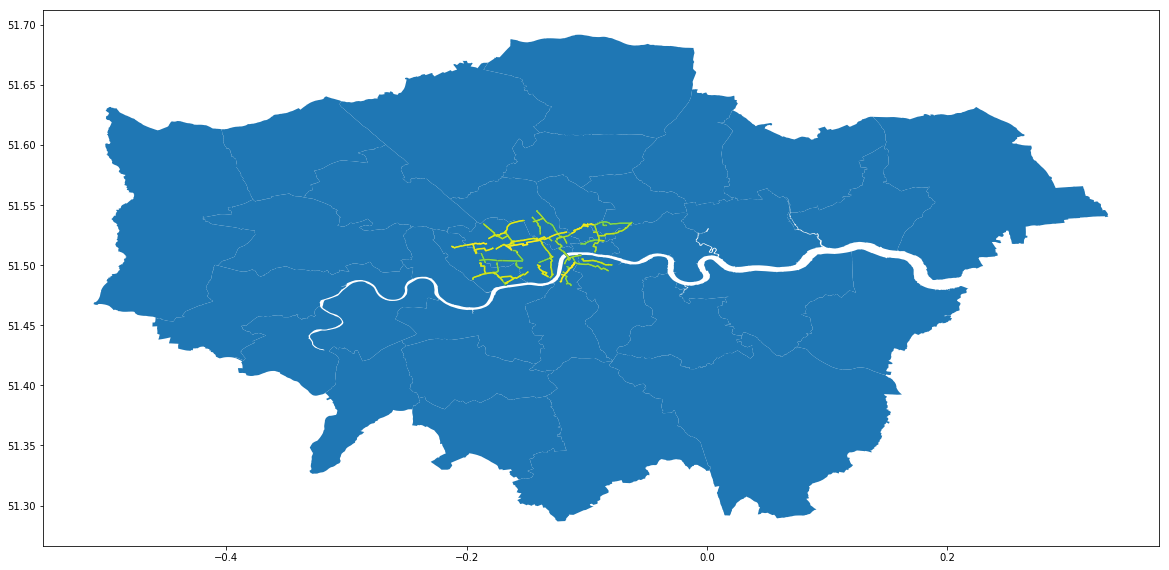

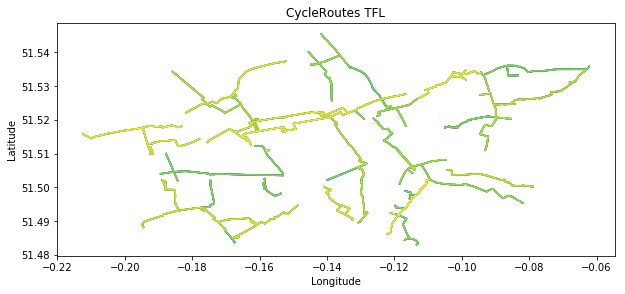

In [24]:
#Read ward shape file
london_gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
#read cycleroutes shape file
gpd_cycleroutes = gpd.read_file("CycleRoutes_Cleaned.shp")
gpd_cycleroutes.head()

#Plot choropleth
f, ax = plt.subplots(1,figsize=(20, 20))
gpd_cycleroutes.plot(ax = ax, cmap="viridis", alpha=1, legend=True)
london_gdf.to_crs(epsg="4326").plot(ax=ax)

f, ax = plt.subplots(1, figsize=(10,8))
gpd_cycleroutes.plot(ax = ax, cmap="viridis", alpha=1, legend=True)
plt.title("CycleRoutes TFL")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

london_gdf.head()

##### Clustering ###

In [53]:
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.cluster import  KMeans

variables = ['StartStation latitude', 'StartStation longitude', 'StartStation Id Used']
df = df_startStations[variables]
df.head()
#df.info()

StartStation latitude  StartStation longitude  StartStation Id Used
0               51.541596               -0.125441                 325.0
1               51.466232               -0.113180                2294.0
10              51.520069               -0.206338                4153.0
12              51.511726               -0.113856                4187.0
16              51.498125               -0.011457                4260.0

In [61]:
df_scaled = pd.DataFrame(scale(df[["StartStation latitude", "StartStation longitude"]]), index=df.index, columns={"StartStation latitude", "StartStation longitude"}).rename(lambda x: str(int(x)))


X = df_scaled.values
X[:5]

array([[ 1.76149522,  0.0539325 ],
       [-1.96150697,  0.27598064],
       [ 0.69807623, -1.4110607 ],
       [ 0.28590906,  0.26373852],
       [-0.38598405,  2.11812004]])

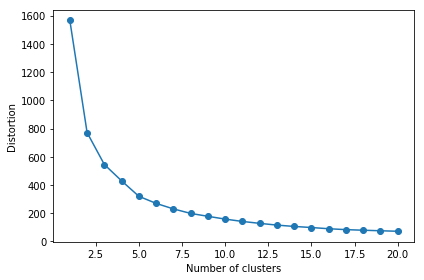

In [62]:
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, 
                    init='k-means++', # this can be left out, as it is the default
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,21), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [63]:
km = KMeans(n_clusters=8, 
            init='random', # leave this out for k-means++ (see below)
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
kmcls= km.fit(X)
y_km = km.fit_predict(X)
y_km

array([4, 6, 7, 0, 2, 1, 6, 6, 2, 3, 2, 6, 6, 2, 3, 5, 3, 7, 6, 0, 5, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 6, 1, 2, 3, 6, 1, 2, 1, 1, 1, 2, 6, 7,
       5, 3, 6, 2, 2, 1, 3, 7, 3, 6, 2, 3, 3, 7, 1, 6, 1, 1, 6, 7, 4, 6,
       7, 0, 6, 3, 3, 2, 6, 3, 6, 3, 3, 2, 1, 2, 5, 2, 3, 1, 7, 3, 0, 3,
       3, 7, 7, 4, 2, 3, 7, 3, 4, 3, 0, 2, 5, 1, 4, 4, 3, 6, 4, 6, 6, 1,
       2, 1, 1, 4, 7, 2, 2, 4, 6, 1, 4, 6, 6, 4, 5, 5, 7, 6, 5, 7, 0, 1,
       1, 4, 3, 1, 7, 6, 5, 1, 5, 1, 0, 0, 3, 6, 0, 0, 7, 7, 1, 6, 3, 6,
       0, 1, 5, 5, 3, 5, 7, 3, 1, 2, 7, 7, 6, 7, 5, 1, 3, 2, 1, 6, 2, 4,
       1, 2, 1, 3, 3, 5, 2, 7, 5, 3, 1, 1, 6, 5, 6, 1, 3, 0, 3, 7, 5, 6,
       1, 7, 6, 6, 6, 5, 1, 1, 5, 6, 7, 7, 6, 3, 5, 7, 6, 5, 6, 4, 4, 1,
       1, 6, 1, 6, 3, 3, 1, 7, 3, 5, 1, 1, 5, 0, 6, 6, 7, 4, 7, 3, 5, 3,
       1, 7, 3, 1, 1, 6, 0, 5, 5, 1, 7, 1, 3, 0, 4, 6, 3, 3, 0, 5, 0, 1,
       6, 3, 0, 4, 7, 4, 4, 5, 3, 7, 5, 0, 5, 4, 1, 6, 6, 4, 7, 1, 0, 6,
       1, 7, 7, 3, 6, 5, 3, 3, 1, 3, 5, 0, 0, 5, 0,

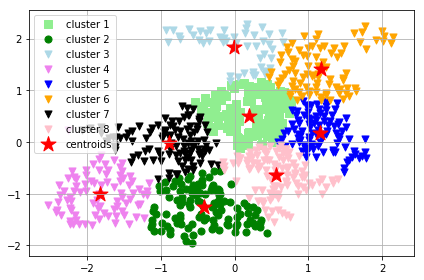

In [64]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='green', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(X[y_km==3,0], 
            X[y_km==3,1], 
            s=50, 
            c='violet', 
            marker='v', 
            label='cluster 4')
plt.scatter(X[y_km==4,0], 
            X[y_km==4,1], 
            s=50, 
            c='blue', 
            marker='v', 
            label='cluster 5')
plt.scatter(X[y_km==5,0], 
            X[y_km==5,1], 
            s=50, 
            c='orange', 
            marker='v', 
            label='cluster 6')
plt.scatter(X[y_km==6,0], 
            X[y_km==6,1], 
            s=50, 
            c='black', 
            marker='v', 
            label='cluster 7') 
plt.scatter(X[y_km==7,0], 
            X[y_km==7,1], 
            s=50, 
            c='pink', 
            marker='v', 
            label='cluster 8') 
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids') 

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

In [65]:
labeled = df.assign(cluster=kmcls.labels_)
labeled.head()

StartStation latitude  StartStation longitude  StartStation Id Used  \
0               51.541596               -0.125441                 325.0   
1               51.466232               -0.113180                2294.0   
10              51.520069               -0.206338                4153.0   
12              51.511726               -0.113856                4187.0   
16              51.498125               -0.011457                4260.0   

    cluster  
0         4  
1         6  
10        7  
12        0  
16        2

##### Statistics ####
> ___TODO:___ Add further histogram plots based on weather data (e.g. do more people use bicycles when it rains or when the sun shines?...) Also the histogram plot for usage should be updated (x = Station ID, y = Usage) or (x = StartStation ID and EndStation ID, y= frequency).

In [32]:
df_startStations.head()

StartStation Id  Duration  StartStation Id Used  \
0               836      2100                 325.0   
1               831      1320                2294.0   
10              805      1500                4153.0   
12               79      1020                4187.0   
16              474      1020                4260.0   

                StartStation Address  StartStation latitude  \
0              York Way, Kings Cross              51.541596   
1        St John's Crescent, Brixton              51.466232   
10  Bevington Road, North Kensington              51.520069   
12            Arundel Street, Temple              51.511726   
16      Castalia Square, Cubitt Town              51.498125   

    StartStation longitude StartStation capacity  
0                -0.125441                    24  
1                -0.113180                    25  
10               -0.206338                    27  
12               -0.113856                    18  
16               -0.011457                    39

In [67]:
variables = ['StartStation Id Used', 'cluster']
Id = df_startStations['StartStation Id']
df_usage = labeled[variables]
df_usage= pd.concat([Id,df_usage], axis=1)
X_usage = df_usage.values

df_usage.head()

StartStation Id  StartStation Id Used  cluster
0               836                 325.0        4
1               831                2294.0        6
10              805                4153.0        7
12               79                4187.0        0
16              474                4260.0        2

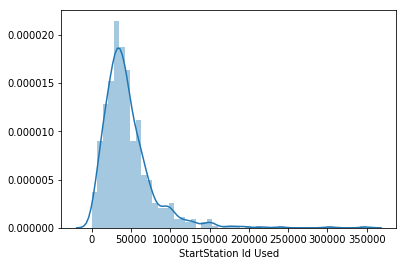

In [69]:
sns.distplot(df_usage['StartStation Id Used'])

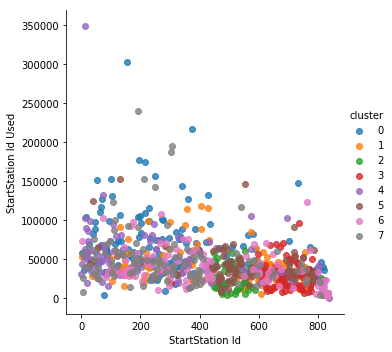

In [70]:
# Plot using Seaborn
sns.lmplot(x='StartStation Id', y='StartStation Id Used', data=df_usage,
           fit_reg=False, 
           hue='cluster')